# How to simulate sales data in Python

Why simulate data?

Have you ever spent an inordinate amount of time looking for the right
data set to try out an analytical technique, but you don't quite find
what you are looking for.

Well, why not just create your own dataset for maximum flexibility which
gives you a few advantages:

1.  To test your analysis to make sure it's working.
2.  To make changes to your dataset to see what happens and how your
    conclusions might change based on different parameters . (e.g. How
    sales are impacted by different levels of the price of our product).

## Import Packages

In [1]:
#Import pandas and numpy
import pandas as pd
import numpy as np
from numpy import random

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import Seaborn
import seaborn as sns

#Import datetime for working with dates
from datetime import datetime

## Data Simulation

First, we will create a skeleton data frame to hold our variables and
initialize with 0 values for all columns except the date column.

1.  Sales date (week level granularity)
2.  Unit sales
3.  Unit price
4.  Paid social ads
5.  Promotion - whether there was a promotion this week.

In [2]:
#Set seed so that when reproducing the dataset, we get the same results.
np.random.seed(90210)

Visit https://pandas.pydata.org/docs/user_guide/timeseries.html for a list of all parameters we can use in the freq argument of the date_range function, but since we want weekly dates, we will use the freq = 'W-TUE' argument since Jan 1st was a Tuesday.

In [3]:
#Create date sequence of 52 weeks using date_range function
sales_date = pd.date_range('2019-01-01', periods=52, freq = 'W-TUE')

#Check results
print(sales_date)

DatetimeIndex(['2019-01-01', '2019-01-08', '2019-01-15', '2019-01-22',
               '2019-01-29', '2019-02-05', '2019-02-12', '2019-02-19',
               '2019-02-26', '2019-03-05', '2019-03-12', '2019-03-19',
               '2019-03-26', '2019-04-02', '2019-04-09', '2019-04-16',
               '2019-04-23', '2019-04-30', '2019-05-07', '2019-05-14',
               '2019-05-21', '2019-05-28', '2019-06-04', '2019-06-11',
               '2019-06-18', '2019-06-25', '2019-07-02', '2019-07-09',
               '2019-07-16', '2019-07-23', '2019-07-30', '2019-08-06',
               '2019-08-13', '2019-08-20', '2019-08-27', '2019-09-03',
               '2019-09-10', '2019-09-17', '2019-09-24', '2019-10-01',
               '2019-10-08', '2019-10-15', '2019-10-22', '2019-10-29',
               '2019-11-05', '2019-11-12', '2019-11-19', '2019-11-26',
               '2019-12-03', '2019-12-10', '2019-12-17', '2019-12-24'],
              dtype='datetime64[ns]', freq='W-TUE')


We want to add weeks with marketing promotions. We can simulate promotions using the binomial distribution. The notation of the binomial distribution is B(n,p), where n is the number of experiments or trials, and p is the probability of success.

In [4]:
#Create weeks where there were promotions running. 10% likelihood of a promotion
promotion = np.random.binomial(n=1, p=0.10, size=len(sales_date))

#Check results
print(promotion)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


Let's create data for the paid social ads. We want to add Paid Social values for the range of dates between July and September and again in December.

In [5]:
#Create a repeating list of 0's
social = [0] * len(sales_date)

print(social)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Generate the product's price and place in a vector and then we'll use
the random.choices method to randomly create prices. We will only create two (2) price points for our product. We want to use random sampling with replacement. If you wanted to use random sampling without replacement, you could use the random.sample function from the random module.

In [6]:
import random #So as not to be confused with np.random

prices_list = [4.50, 4.99]

#Create price values
price = random.choices(prices_list, k = len(sales_date))

#Check output
print(price)

[4.99, 4.99, 4.5, 4.99, 4.99, 4.5, 4.5, 4.99, 4.5, 4.5, 4.5, 4.5, 4.99, 4.99, 4.5, 4.5, 4.5, 4.99, 4.5, 4.99, 4.5, 4.99, 4.5, 4.99, 4.5, 4.5, 4.5, 4.5, 4.99, 4.99, 4.99, 4.99, 4.5, 4.99, 4.99, 4.5, 4.5, 4.99, 4.5, 4.99, 4.5, 4.5, 4.5, 4.99, 4.99, 4.99, 4.99, 4.99, 4.5, 4.5, 4.5, 4.99]


### Generate unit sales

Next step is to generate sales data based on unit sales and place into a temporary sales variable. Sales is randomly generated based on a poisson distribution.

In [7]:
#Generate unit sales - poisson distribution
temp_sales = np.random.poisson(size=len(sales_date), lam = 8300)

#Check results
print(temp_sales)

[8374 8307 8374 8294 8503 8276 8335 8423 8329 8289 8209 8378 8210 8311
 8207 8348 8259 8386 8399 8227 8439 8171 8308 8276 8450 8267 8406 8237
 8125 8270 8224 8189 8343 8274 8350 8187 8205 8180 8315 8340 8345 8253
 8350 8293 8411 8151 8208 8458 8401 8283 8338 8293]


In [8]:
#Scale sales up according to price to follow a logarithmic function
#Scale sales by multiplying sales by the log of price
temp_sales = temp_sales * np.log(price)

#Check output
print(temp_sales)

[13460.66830836 13352.9701024  12595.1441206  13332.07343558
 13668.02754072 12447.74453572 12536.48510213 13539.43266794
 12527.46063775 12467.29754188 12346.97135014 12601.16043019
 13197.04881916 13359.39984604 12343.96319534 12556.03810829
 12422.17521998 13479.95753928 12632.74605552 13224.37522962
 12692.90915139 13134.35881868 12495.87501242 13303.1395892
 12709.45400276 12434.20783915 12643.2745973  12389.08551725
 13060.41676683 13293.49497374 13219.55292189 13163.29266505
 12548.5177213  13299.92471738 13422.08984652 12313.88164741
 12340.95504055 13148.82574186 12506.40355419 13406.01548743
 12551.5258761  12413.15075559 12559.04626308 13330.46599967
 13520.14343702 13102.21010048 13193.83394734 13595.69292478
 12635.75421032 12458.2730775  12540.99733432 13330.46599967]


In our last step, we need to take our temporary sales and
add an increase of 30% in unit sales for weeks we have the promotion
running. We want to show the boost in sales in the weeks where there are
promotions. We will add the floor function from numpy to remove fractions and return the largest integer.

In [9]:
#Add impact of increased sales due to week where a promotion was running
unit_sales = np.floor(temp_sales * (1 + promotion * 0.30))

#Check results
print(unit_sales)

[13460. 17358. 12595. 13332. 13668. 12447. 12536. 13539. 12527. 12467.
 12346. 12601. 13197. 13359. 12343. 16322. 12422. 13479. 12632. 13224.
 12692. 13134. 12495. 13303. 12709. 12434. 12643. 12389. 13060. 13293.
 17185. 13163. 12548. 13299. 17448. 12313. 12340. 17093. 12506. 13406.
 12551. 12413. 12559. 13330. 13520. 13102. 17151. 13595. 12635. 12458.
 12540. 13330.]


## Putting it all together

Can use the zip function to convert lists of rows into lists of columns

In [10]:
# Creating DataFrame
# Can use the zip function to convert lists of rows into lists of columns
df = pd.DataFrame(list(zip(sales_date, unit_sales, promotion, social, price)), columns = ['sales_date', 'unit_sales', 'promotion', 'social', 'price'])

# displaying resulting DataFrame
print(df)

   sales_date  unit_sales  promotion  social  price
0  2019-01-01     13460.0          0       0   4.99
1  2019-01-08     17358.0          1       0   4.99
2  2019-01-15     12595.0          0       0   4.50
3  2019-01-22     13332.0          0       0   4.99
4  2019-01-29     13668.0          0       0   4.99
5  2019-02-05     12447.0          0       0   4.50
6  2019-02-12     12536.0          0       0   4.50
7  2019-02-19     13539.0          0       0   4.99
8  2019-02-26     12527.0          0       0   4.50
9  2019-03-05     12467.0          0       0   4.50
10 2019-03-12     12346.0          0       0   4.50
11 2019-03-19     12601.0          0       0   4.50
12 2019-03-26     13197.0          0       0   4.99
13 2019-04-02     13359.0          0       0   4.99
14 2019-04-09     12343.0          0       0   4.50
15 2019-04-16     16322.0          1       0   4.50
16 2019-04-23     12422.0          0       0   4.50
17 2019-04-30     13479.0          0       0   4.99
18 2019-05-0

Replacing values in pandas DataFrame based on single or multiple conditions


**On a specific date:**
If you want to select and replace 0 values with the same value greater than a specific date, use the following code:

df.loc[df.sales_date == '2019-01-06', 'social'] = 200


**Between 1 date range:**
If you want to select and replace 0 values with the same value between one date range (in between 2 specific dates,) use the following code:


df.loc[(df['sales_date'] >= '2019-07-02') & (df['sales_date'] <= '2019-09-10'), 'social'] = 200


**Between 2 date ranges:**
If you want to select and replace 0 values with the same value between two date ranges, use the following code:

df.loc[(df['sales_date'] >= '2019-07-02') & (df['sales_date'] <= '2019-09-10') | (df['sales_date'] >= '2019-12-03') & (df['sales_date'] <= '2019-12-24'), 'social'] = 200


In [11]:
#Select and replace values between dates (We have 2 date ranges were we spent different amounts)
df.loc[(df['sales_date'] >= '2019-07-02') & (df['sales_date'] <= '2019-09-10'), 'social'] = 350
df.loc[(df['sales_date'] >= '2019-12-03') & (df['sales_date'] <= '2019-12-24'), 'social'] = 200
print(df)

   sales_date  unit_sales  promotion  social  price
0  2019-01-01     13460.0          0       0   4.99
1  2019-01-08     17358.0          1       0   4.99
2  2019-01-15     12595.0          0       0   4.50
3  2019-01-22     13332.0          0       0   4.99
4  2019-01-29     13668.0          0       0   4.99
5  2019-02-05     12447.0          0       0   4.50
6  2019-02-12     12536.0          0       0   4.50
7  2019-02-19     13539.0          0       0   4.99
8  2019-02-26     12527.0          0       0   4.50
9  2019-03-05     12467.0          0       0   4.50
10 2019-03-12     12346.0          0       0   4.50
11 2019-03-19     12601.0          0       0   4.50
12 2019-03-26     13197.0          0       0   4.99
13 2019-04-02     13359.0          0       0   4.99
14 2019-04-09     12343.0          0       0   4.50
15 2019-04-16     16322.0          1       0   4.50
16 2019-04-23     12422.0          0       0   4.50
17 2019-04-30     13479.0          0       0   4.99
18 2019-05-0

## Check Results

In [12]:
#Descriptive statistics
print(df.describe())

         unit_sales  promotion      social      price
count     52.000000  52.000000   52.000000  52.000000
mean   13355.596154   0.115385   89.423077   4.735577
std     1429.694130   0.322603  146.306333   0.247207
min    12313.000000   0.000000    0.000000   4.500000
25%    12521.750000   0.000000    0.000000   4.500000
50%    12884.500000   0.000000    0.000000   4.500000
75%    13370.750000   0.000000  200.000000   4.990000
max    17448.000000   1.000000  350.000000   4.990000


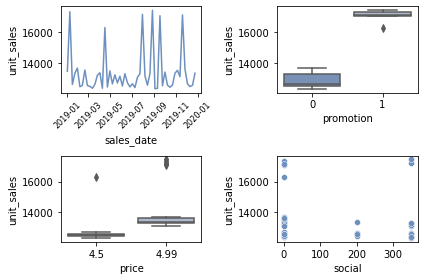

In [13]:
# Set the color palette
sns.set_palette(sns.color_palette("vlag"))

#Initialize subplots with number of rows and number of columns
figure, ax = plt.subplots(nrows = 2, ncols = 2)

#Get readable axis labels for plot 1 which has a date on the x-axis(time series plot)
plt.sca(ax[0, 0])
plt.xticks(rotation=45, fontsize = 8)
#plt.xticks([]) #This disables the x-ticks (uncomment and run if you prefer the x-axis to be blank)

#See the distribution of the data
sns.lineplot(data=df, x="sales_date",y="unit_sales", ax=ax[0,0])
sns.boxplot(data=df, x="promotion", y="unit_sales", ax=ax[0,1])
sns.scatterplot(data=df, x="social", y="unit_sales", ax=ax[1,1])
sns.boxplot(data=df, x="price", y="unit_sales", ax=ax[1,0])

#Gives a tidy layout
plt.tight_layout()

#Show plot
plt.show()

In [14]:
#Correlation Plot Matrix
#Pearson is the default correlation method that is used for normally distributed data
corr = df.corr(method = "pearson")
print(corr)

            unit_sales  promotion    social     price
unit_sales    1.000000   0.953281  0.044754  0.520260
promotion     0.953281   1.000000  0.067907  0.254851
social        0.044754   0.067907  1.000000  0.017114
price         0.520260   0.254851  0.017114  1.000000


In [15]:
corr.style.background_gradient(cmap='RdBu')

,unit_sales,promotion,social,price
unit_sales,1.000000,0.953281,0.044754,0.520260
promotion,0.953281,1.000000,0.067907,0.254851
social,0.044754,0.067907,1.000000,0.017114
price,0.520260,0.254851,0.017114,1.000000


## Export simulated dataset

In [16]:
#Save simulated dataset as a csv file or excel file
df.to_csv("datasets/weekly_sales_data.csv")

#Using to_excel from pandas
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#
df.to_excel("datasets/weekly_sales_data.xlsx", sheet_name='Sheet1')

In [17]:
#Check if files exist in directory we designated above using os package
import os

#Check file one - csv file
os.path.isfile("datasets/weekly_sales_data.csv")

True

In [18]:
#Check file two - Excel sheets
os.path.isfile("datasets/weekly_sales_data.xlsx")

True

***

#### References

[1]  Chapman, C. and McDonnell Feit, E., (2015). R for marketing research
    and analytics. Cham: Springer, pp.47-59, 162-191.